# Wrangle WeRateDogs Twitter data 

## Table of Contents
<ul>
<li><a href="#intro">Project Details</a></li>
<li><a href="#gather">Data Wrangling - Gather Data</a></li>
<li><a href="#assess">Data Wrangling - Assess Data</a></li>
<li><a href="#clean">Data Wrangling - Clean Data</a></li>

<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
### Project Details
- Data wrangling, which consists of:
    - Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

#### Keypoints to consider:
- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [1]:
# import libs
import pandas as pd
import numpy as np
import os
import requests
from PIL import Image
from io import BytesIO
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

<a id='gather'></a>
## Gather

In [2]:
# gather twitter archive by downloading twitter_archive_enhanced.csv  to /data
df_ta = pd.read_csv('data/twitter-archive-enhanced.csv')

In [3]:
# gather img predictions by downloading image-predictions.tsv  to /data
df_ip = pd.read_csv('data/image-predictions.tsv', sep='\t')
df_ip.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [4]:
# gather additional twitter data by downloading pre-gathered twitter data
df_list = []

# read txt file line by line with json lib
with open('data/tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        df_list.append({'tweet_id': json_data['id'],
                        'retweet_count': json_data['retweet_count'],
                        'favorite_count': json_data['favorite_count']})

# store list in a dataframe
df_tj = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_tj.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


**Remark regarding additional twitter data:**

I had to shy away from reopening my own twitter account, since I had difficulties dealing with the toxity of twitter. Thus I had to utilitze the pre-gathered data file *tweet_json.txt*.

<a id='assess'></a>
## Assess

#### Assess twitter archive data-frame df_ta

In [5]:
# assess twitter archive
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
df_ta.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_ta.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
# check amnt of dogs which are only one char long
sum(df_ta.name.apply(len) == 1)

# check for duplicates in twitter_id column
df_ta.tweet_id.duplicated().any()

# check amnt of dogs which have no name (and are refered as "None")
sum(df_ta.name.str.contains('None'))

745

**Quality Issues (minimum 8):**
- wrong datatype for 
    - *tweet_id* (should be a string)
    - *timestamp* (should be datetime)
    - *retweeted_status_id* (should be string)
    - *retweeted_status_timestamp* (should be datetime)
- timestamp encoding with reduntant +0000 
- some dog names in name column consists only of one letter
- rating numerator scale exeeds 10 and should be adjusted
- string columns have strings filled with "None" (instead of NaNs)
- non string columns have strings filled with "NaN" (instead of NaN)

**Tidiness Issues (minimum 2):**
- text includes many kind of information and should be split up
- unused columns:
    - *in_reply_to_status_id*
    - *in_reply_to_user_id*
- merge dog "stages" columns in one column
- amnt of rows is different for the 3 datasets
- dognames somtimes start with lower and sometimes with upper case letter

#### Assess image predictions data-frame df_ip

In [9]:
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
# check for duplicates in twitter_id column
df_ip.tweet_id.duplicated().any()

False

**Quality Issues (minimum 8):**
- some information refer not to dogs

**Tidiness Issues (minimum 2):**
- dognames somtimes starte with lower or upper case letter

**Remark:**

**There wont be any distinguishment between the three dataframes in the following cleaning steps.**

This is since most of the the qualitiy and tidiness issues are realted to the twitter archive and all 3 dataframes will be merged anyway.
    


#### Assess twitter json data-frame df_tj

In [12]:
df_tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [13]:
df_tj.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [14]:
# check for duplicates in twitter_id column
df_tj.tweet_id.duplicated().any()

False

**Quality Issues (minimum 8):**
- N/A

**Tidiness Issues (minimum 2):**
- N/A

<a id='clean'></a>
## Clean

In [15]:
# make copies of all 3 dataframes
df1 = df_ta.copy()
df2 = df_ip.copy()
df3 = df_tj.copy()

#### Define (Quality #1)
- wrong datatype for 
    - *tweet_id* (should be string)
    - *retweeted_status_id* (should be string)

#### Code

In [16]:
df1.tweet_id = df1.tweet_id.astype(str)
df2.tweet_id = df2.tweet_id.astype(str)
df3.tweet_id = df3.tweet_id.astype(str)
df1.retweeted_status_id = df1.retweeted_status_id.astype(str)

#### Test

In [17]:
df1.info();
df2.info();
df3.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(3), int64(2), o

#### Define (Tidy #1)
    - merge all dataframes into one dataframe usinge the foreign key 'tweet_id'

#### Code

In [18]:
df = pd.merge(df1,df2, on ='tweet_id')
df = pd.merge(df, df3, on ='tweet_id')

#### Test

In [19]:
df.shape

(2073, 30)

#### Define (Quality #2)
    - drop "nan"s and "None"s and replace with NaN


#### Code

In [20]:
columns = df.columns
for columnID in columns:
    if df[columnID].dtype != np.number:
        df[columnID] = df[columnID].replace('([Nn]an)',np.nan, regex=True)
        df[columnID] = df[columnID].replace('([Nn]one)',np.nan, regex=True)
    else:
        df[columnID] = df[columnID].replace('([Nn]an)',np.nan, regex=True)
        df[columnID] = df[columnID].replace('([Nn]one)',np.nan, regex=True)

        

#### Test

In [21]:
#df.retweeted_status_id.replace('nan',np.nan)
df.retweeted_status_id.tail()

2068    NaN
2069    NaN
2070    NaN
2071    NaN
2072    NaN
Name: retweeted_status_id, dtype: object

## Define (Quality #3)
    - calculate rate ratio
    - normalize rate_ratio in order to 0 <= rate_ratio <= 2
    - adopted maxiumum from 1 to 2, since majority exceeds 1 and too much invormation would be lost

#### Code

In [22]:
# insert new column 'rate_ratio' after 'rating_denominator'
tem = df['rating_numerator']/df['rating_denominator']
df.insert(12, 'rate_ratio', tem)

# keep rate_ratio within the limits
df['rate_ratio'].values[df['rate_ratio'] > 2] = 2
df['rate_ratio'].values[df['rate_ratio'] < 0] = 0

#### Test

In [23]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132
2072,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,532,2535


#### Define (Quality #4)
    - drop +0000 in timestamp columns

#### Code

In [24]:
columns =['timestamp','retweeted_status_timestamp']
for columnID in columns:
    df[columnID] =df[columnID].str[:-6]

#### Test

In [25]:
df[columns]

,timestamp,retweeted_status_timestamp
0,2017-08-01 16:23:56,NaN
1,2017-08-01 00:17:27,NaN
2,2017-07-31 00:18:03,NaN
3,2017-07-30 15:58:51,NaN
4,2017-07-29 16:00:24,NaN
...,...,...
2068,2015-11-16 00:24:50,NaN
2069,2015-11-16 00:04:52,NaN
2070,2015-11-15 23:21:54,NaN
2071,2015-11-15 23:05:30,NaN


#### Define (Quality #5)
    - convert *timestamp* (should be datetime)
    - convert *retweeted_status_id* (should be datetime)


#### Code

In [26]:
for columnID in columns:
    df[columnID] = pd.to_datetime(df[columnID])

#### Test

In [27]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 2 columns):
timestamp                     2073 non-null datetime64[ns]
retweeted_status_timestamp    79 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 48.6 KB


###### Define (Quality #6)
- Exclude/Drop non dog entries 
- Extract most probable dog dog breed from CNN

#### Code

In [28]:
# set probabilty to zero for non dogs
df['p1_conf'] = np.where(df['p1_dog']==False, 0, df['p1_conf'])
df['p2_conf'] = np.where(df['p2_dog']==False, 0, df['p2_conf'])
df['p3_conf'] = np.where(df['p3_dog']==False, 0, df['p3_conf'])

# insert summary cells
df.insert(23, 'dog_breed', df['p1'])
df.insert(24, 'dog_conf', df['p1_conf'])

# get highest probabilty and assign dog breed
df['dog_breed'] = np.where(df['p3_conf']>df['p2_conf'], df['p3'], df['dog_breed'])
df['dog_breed'] = np.where(df['p2_conf']>df['p1_conf'], df['p2'], df['dog_breed'])
df['dog_conf'] = np.where(df['p3_conf']>df['p2_conf'], df['p3_conf'], df['dog_conf'])
df['dog_conf'] = np.where(df['p2_conf']>df['p1_conf'], df['p2_conf'], df['dog_conf'])

# remove rows which are highly improbable
margin = 0.05
df = df[df.dog_conf >= margin]


### Test

In [29]:
df[['p1','p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog', 'dog_breed', 'dog_conf']].head()


,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,dog_conf
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
3,paper_towel,0.000000,False,Labrador_retriever,0.168086,True,spatula,0.000000,False,Labrador_retriever,0.168086
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
5,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.000000,False,Chesapeake_Bay_retriever,0.425595


#### Define (Quality #7)
- Extract dog attributes from text column
- Store as lower case attribute

#### Code

In [30]:
columnlist_tgt = ['doggo', 'floofer', 'pupper', 'puppo']
columnlist_src = ['([Dd]oggo)', '([Ff]loofer)', '([Pp]upper)', '([Pp]uppo)']

for idx, val in enumerate(columnlist_tgt):
    # extract string as lower case word
    df[columnlist_tgt[idx]] = df['text'].str.extract(columnlist_src[idx])
    df[columnlist_tgt[idx]] = df[columnlist_tgt[idx]].str.lower()

In [31]:
for columnID in columnlist_tgt:
    print(df[columnID].unique())

[nan 'doggo']
[nan 'floofer']
[nan 'pupper']
[nan 'puppo']


#### Define (Quality #8)
    - combine dog attributes to one column
    - since we assume dog can be only either one of them we use update and pop

#### Code

In [32]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
checksum = 0
df['dog_attr'] = df[columns[0]]
for idx, val in enumerate(columns):
    checksum = checksum + df[columns[idx]].count()
    df['dog_attr'].update(df.pop(val))

#### Test

In [33]:
override_mixed_sum = checksum - df['dog_attr'].count()
print(override_mixed_sum>=0, override_mixed_sum)
df['dog_attr'].unique()

True 13


array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

## Define (Tidy #2)
    - correct (dog)names and dog-breeds to begin with lower case letter
    - replace (dig)name a with NaN

#### Code

In [34]:
df['name'] = df['name'].str.lower()
df['dog_breed'] = df['dog_breed'].str.lower()
df['name'] = df['name'].replace('a',np.nan)

#### Test

In [35]:
df['name']

1          tilly
2         archie
3          darla
4       franklin
5            NaN
          ...   
2068         NaN
2069         NaN
2070         NaN
2071         NaN
2072         NaN
Name: name, Length: 1639, dtype: object

### Define (Tidy #3)
    - drop columns which are not relevant for further analysis

#### Code

In [36]:
columns_to_drop = ['in_reply_to_status_id',
                   'in_reply_to_user_id',
                   #'text',
                   'img_num',
                   'source',
                   'p1', 'p2', 'p3',
                   'p1_conf', 'p2_conf', 'p3_conf',
                   'p1_dog', 'p2_dog', 'p3_dog',
                   'retweeted_status_user_id',
                   'retweeted_status_timestamp'
                  ]
for columnID in columns_to_drop:
    df.drop(columnID, axis=1, inplace=True)

#### Test

In [37]:
df.columns

Index(['tweet_id', 'timestamp', 'text', 'retweeted_status_id', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'rate_ratio', 'name',
       'jpg_url', 'dog_breed', 'dog_conf', 'retweet_count', 'favorite_count',
       'dog_attr'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639 entries, 1 to 2072
Data columns (total 15 columns):
tweet_id               1639 non-null object
timestamp              1639 non-null datetime64[ns]
text                   1630 non-null object
retweeted_status_id    59 non-null object
expanded_urls          1639 non-null object
rating_numerator       1639 non-null int64
rating_denominator     1639 non-null int64
rate_ratio             1639 non-null float64
name                   1185 non-null object
jpg_url                1639 non-null object
dog_breed              1639 non-null object
dog_conf               1639 non-null float64
retweet_count          1639 non-null int64
favorite_count         1639 non-null int64
dog_attr               276 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 204.9+ KB


### Store Master file

In [39]:
df.to_csv('result/twitter_archive_master.csv', index = False)


<a id='eda'></a>
## Exploratory Data Analysis

In [40]:
df.head()
df.shape

(1639, 15)

In [41]:
df.describe()

,rating_numerator,rating_denominator,rate_ratio,dog_conf,retweet_count,favorite_count
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000
mean,11.466748,10.482611,1.089844,0.561027,2927.587553,8732.450275
std,7.521964,6.504120,0.181762,0.291238,4691.574738,11962.519243
min,1.000000,2.000000,0.200000,0.050512,16.000000,0.000000
25%,10.000000,10.000000,1.000000,0.319108,664.500000,1860.500000
50%,11.000000,10.000000,1.100000,0.565981,1489.000000,4144.000000
75%,12.000000,10.000000,1.200000,0.825674,3463.500000,11107.000000
max,165.000000,150.000000,2.000000,0.999956,56625.000000,132810.000000


**Obersavation**
- rating numerator is on average above 10 and technically on average out of its limitations
- on average a high amount of retweets can be oberseved (~3000)
- on average a high amount of likes can be oberseved (~8700)

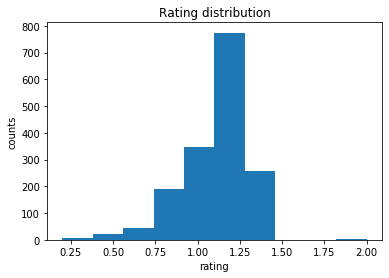

In [42]:
df_h1 = df.query('rate_ratio <= 0.9')
df_h2 = df.query('rate_ratio > 1.3')
plt.hist(df.rate_ratio);
plt.xlabel('rating')
plt.ylabel('counts');
plt.title('Rating distribution');

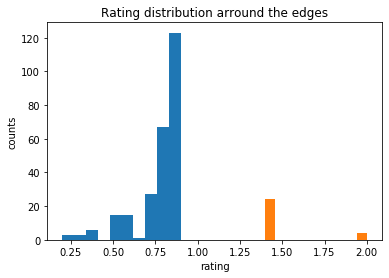

In [43]:
plt.hist(df_h1.rate_ratio);
plt.hist(df_h2.rate_ratio);
plt.xlabel('rating')
plt.ylabel('counts');
plt.title('Rating distribution arround the edges');


**Obersavation**
- one can argue that  a guassian bell can be obsreved arround the "meme"-rating 13/10

In [44]:
df.name.value_counts()

cooper     10
charlie    10
tucker     10
penny       9
oliver      9
           ..
river       1
zara        1
reptar      1
bruiser     1
jimbo       1
Name: name, Length: 806, dtype: int64

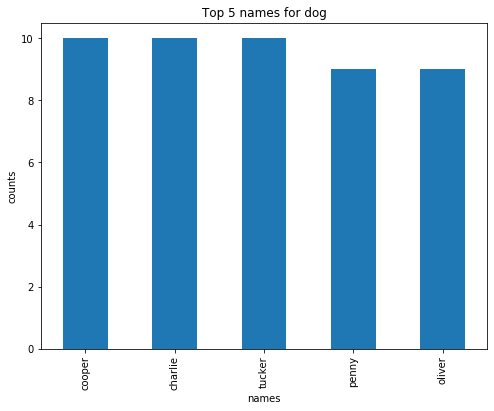

In [45]:
df['name'].value_counts()[0:5].plot(kind= 'bar', figsize = (8,6))
plt.title('Top 5 names for dog')
plt.xlabel('names')
plt.ylabel('counts');

**Obersavation**
- its close at the top, but the most occurred names seem to be "cooper", "Tucker" and "Charlie".

In [46]:
df.dog_breed.value_counts()

golden_retriever        168
labrador_retriever      101
pembroke                 92
chihuahua                82
pug                      56
                       ... 
silky_terrier             1
entlebucher               1
bouvier_des_flandres      1
scotch_terrier            1
standard_schnauzer        1
Name: dog_breed, Length: 113, dtype: int64

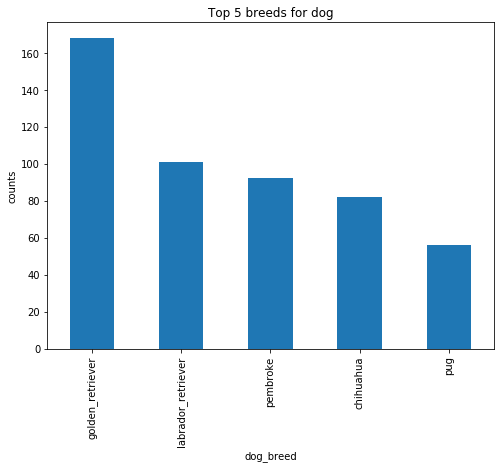

In [47]:
df['dog_breed'].value_counts()[0:5].plot(kind= 'bar', figsize = (8,6))
plt.title('Top 5 breeds for dog')
plt.xlabel('dog_breed')
plt.ylabel('counts');

**Obersavation**
- its not close at the top, but the most occurred names seem to be "golden_retriever".

In [48]:
df_fav = df.groupby('dog_breed').mean()['favorite_count']
df_fav = df_fav.sort_values(ascending = False)

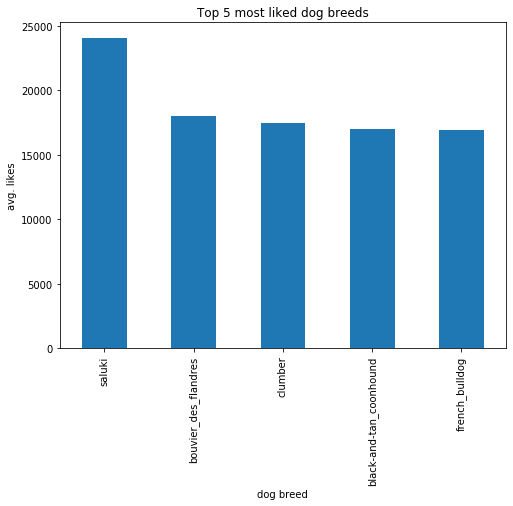

In [49]:
df_fav[0:5].plot(kind= 'bar', figsize = (8,6))
plt.title('Top 5 most liked dog breeds')
plt.xlabel('dog breed')
plt.ylabel('avg. likes');

In [50]:
df_retweet = df.groupby('dog_breed').mean()['retweet_count']
df_retweet = df_retweet.sort_values(ascending = False)

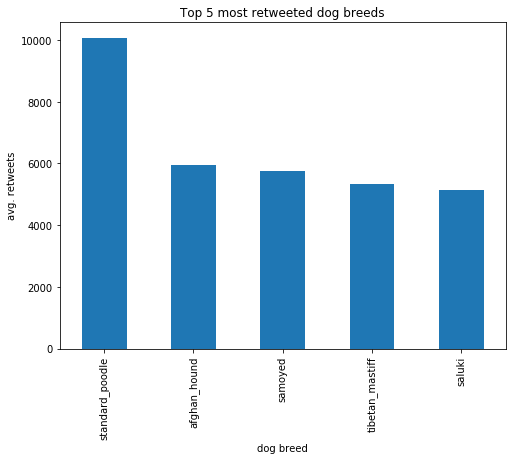

In [51]:
df_retweet[0:5].plot(kind= 'bar', figsize = (8,6))
plt.title('Top 5 most retweeted dog breeds')
plt.xlabel('dog breed')
plt.ylabel('avg. retweets');

In [52]:
df_overall = df_retweet + df_fav
df_overall = df_overall.sort_values(ascending = False)

In [53]:
# check samplesize for winner
len(df.query('dog_breed == "saluki"'))

4

- remove outlier due to small samplesize

In [54]:
df_overall = df_overall.drop(df_overall.index[0])

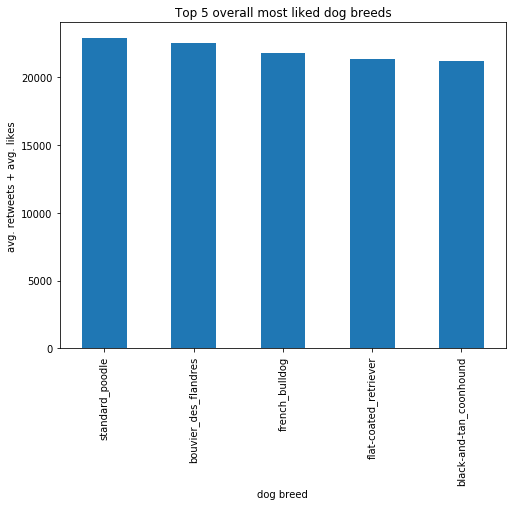

In [55]:
df_overall[0:5].plot(kind= 'bar', figsize = (8,6))
plt.title('Top 5 overall most liked dog breeds')
plt.xlabel('dog breed')
plt.ylabel('avg. retweets + avg. likes');

**Obersavation**
- its close at the top, but the most liked breed using avg. retweets and likes as a metric seem to be the "standard_pooble".
- this is justified he is adorable!

In [56]:
#df.dog_attr.
df.dropna(subset=['dog_attr', 'favorite_count', 'retweet_count'], inplace=True)
df.dog_attr

9        doggo
12       puppo
14       puppo
28      pupper
38       doggo
         ...  
1717    pupper
1724    pupper
1731    pupper
1739    pupper
1862    pupper
Name: dog_attr, Length: 276, dtype: object

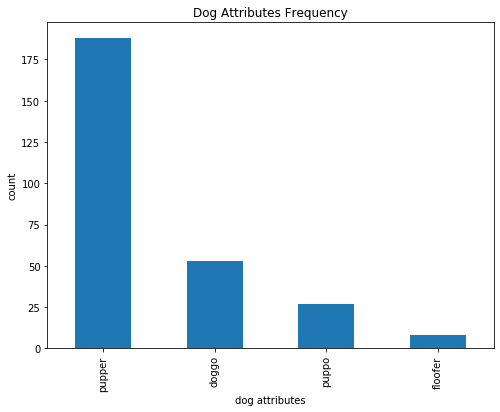

In [57]:
df['dog_attr'].value_counts().plot(kind= 'bar', figsize = (8,6))
plt.title('Dog Attributes Frequency')
plt.ylabel('count')
plt.xlabel('dog attributes');

In [58]:
df.groupby('dog_attr')['favorite_count'].mean()



dog_attr
doggo      16329.811321
floofer    13701.375000
pupper      7685.462766
puppo      22929.222222
Name: favorite_count, dtype: float64

In [59]:
df.groupby('dog_attr')['retweet_count'].mean()


dog_attr
doggo      6579.320755
floofer    4776.750000
pupper     2723.138298
puppo      6865.296296
Name: retweet_count, dtype: float64

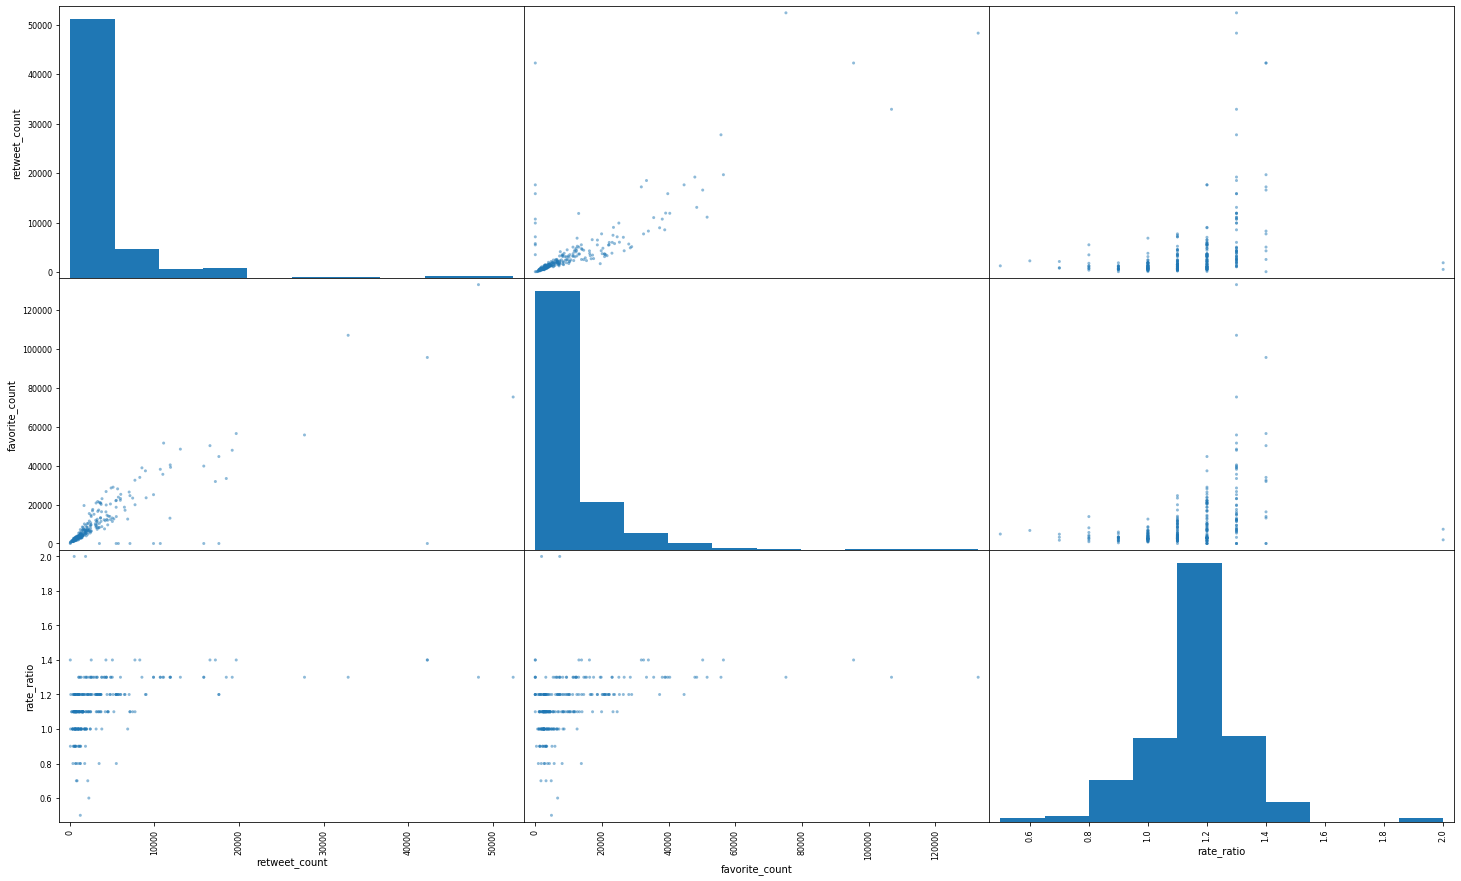

In [60]:
# looking for correlations
pd.plotting.scatter_matrix(df[['retweet_count','favorite_count', 'rate_ratio']], figsize = (25,15));